In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import models,layers

In [6]:
class TimeSeries:
    def __init__(self,data):
        self.data=data
        #self.scaler=MinMaxScaler()
        
    def scaler(self):
        scaler=MinMaxScaler()
        scaled_data=scaler.fit_transform(self.data)
        return scaler,scaled_data
    
    def train_test_split(self,scaled_data,split):
        scaled_train_data=scaled_data[0:int(len(scaled_data)*split),0]
        scaled_test_data=scaled_data[int(len(scaled_data)*split):len(scaled_data),0]
        return scaled_train_data,scaled_test_data

    def create_data(self,data):
        X,Y=np.array([]),np.array([])
        for i in range(50,len(data)):
            X=np.append(X,data[i-50:i])
            Y=np.append(Y,data[i])
        X=np.reshape(X,(X.shape[0]//50,50,1))
        return X,Y
    
    def initialize(self,X_train):
        model=models.Sequential()
        model.add(layers.LSTM(units=96,return_sequences=True,input_shape=(X_train.shape[1],1)))
        model.add(layers.Dropout(0.2))
        model.add(layers.LSTM(units=96,return_sequences=True))
        model.add(layers.Dropout(0.2))
        model.add(layers.LSTM(units=96,return_sequences=True))
        model.add(layers.Dropout(0.2))
        model.add(layers.LSTM(units=96))
        model.add(layers.Dropout(0.2))
        model.add(layers.Dense(1))
        return model
    
    def plot(self,scaler,train_predict,test_predict,title,epoch):
        train_predict=scaler.inverse_transform(train_predict)
        test_predict=scaler.inverse_transform(test_predict)
        look_back=50
        trainPredictPlot = np.empty_like(self.data)
        trainPredictPlot[:, :] = np.nan
        trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
    
        testPredictPlot = np.empty_like(self.data)
        testPredictPlot[:, :] = np.nan
        testPredictPlot[len(train_predict)+(look_back*2):len(self.data), :] = test_predict
        
        plt.figure(figsize=(15,10))
        plt.plot(self.data)
        plt.plot(trainPredictPlot)
        plt.plot(testPredictPlot)
        plt.legend(["Actual data","Predicted training data","Predicted test data"])
        plt.title(title+" for total epochs="+str(epoch))
        plt.show()
    

In [33]:
import time
def generator(df,title):
    data=np.array(df["Open"].values)
    data=np.reshape(data,(-1,1))

    t=TimeSeries(data)

    scaler,scaled_data=t.scaler()

    scaled_train_data,scaled_test_data=t.train_test_split(scaled_data,0.8)

    X_train,Y_train=t.create_data(scaled_train_data)
    print(X_train.shape,Y_train.shape)

    X_test,Y_test=t.create_data(scaled_test_data)
    print(X_test.shape,Y_test.shape)

    model=t.initialize(X_train)

    model.summary()

    model.compile(optimizer="adam",loss="mean_squared_error")

    epochs=[12,25,50,100]
    for epoch in epochs:
        start_time=time.time()
        model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=epoch)
        print("\nProcessing time ",time.time()-start_time)
        train_predict=model.predict(X_train)
        test_predict=model.predict(X_test)
        t.plot(scaler,train_predict,test_predict,title,epoch)

In [34]:
df=pd.read_csv("googl.csv")

In [35]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
1,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
2,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
3,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
4,2004-08-26,52.527527,54.029030,52.382381,54.009010,54.009010,7094898


In [36]:
df["Open"].isna().sum()

0

(3038, 50, 1) (3038,)
(723, 50, 1) (723,)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 50, 96)            37632     
_________________________________________________________________
dropout_20 (Dropout)         (None, 50, 96)            0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 50, 96)            74112     
_________________________________________________________________
dropout_21 (Dropout)         (None, 50, 96)            0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 50, 96)            74112     
_________________________________________________________________
dropout_22 (Dropout)         (None, 50, 96)            0         
_________________________________________________________________
lstm_23 (LST

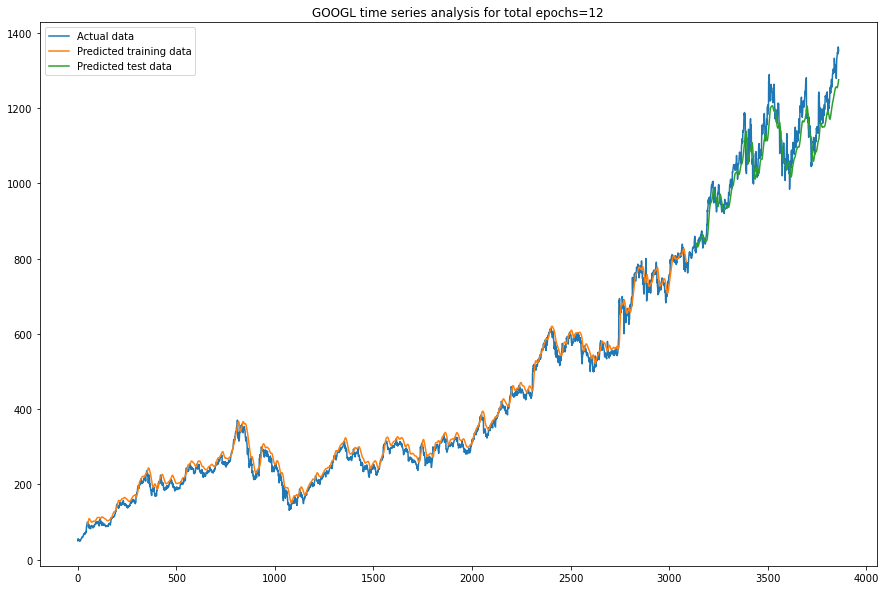

Epoch 1/25
95/95 [==============================] - 20s 205ms/step - loss: 5.0446e-04 - val_loss: 0.0045
Epoch 2/25
95/95 [==============================] - 19s 202ms/step - loss: 4.7013e-04 - val_loss: 0.0053
Epoch 3/25
95/95 [==============================] - 20s 212ms/step - loss: 3.8377e-04 - val_loss: 0.0012
Epoch 4/25
95/95 [==============================] - 29s 303ms/step - loss: 3.5716e-04 - val_loss: 6.5732e-04
Epoch 5/25
95/95 [==============================] - 19s 203ms/step - loss: 3.2283e-04 - val_loss: 0.0023
Epoch 6/25
95/95 [==============================] - 19s 205ms/step - loss: 3.0888e-04 - val_loss: 0.0010
Epoch 7/25
95/95 [==============================] - 19s 202ms/step - loss: 3.0830e-04 - val_loss: 0.0021
Epoch 8/25
95/95 [==============================] - 19s 205ms/step - loss: 3.9953e-04 - val_loss: 6.7973e-04
Epoch 9/25
95/95 [==============================] - 20s 214ms/step - loss: 3.2606e-04 - val_loss: 9.0003e-04
Epoch 10/25
95/95 [========================

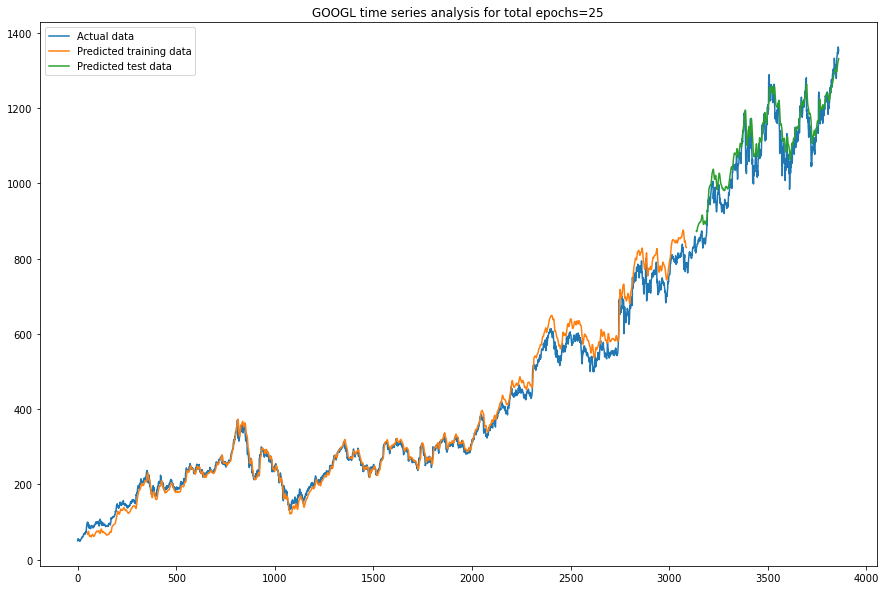

Epoch 1/50
95/95 [==============================] - 19s 200ms/step - loss: 2.0645e-04 - val_loss: 0.0011
Epoch 2/50
95/95 [==============================] - 19s 199ms/step - loss: 2.3672e-04 - val_loss: 0.0016
Epoch 3/50
95/95 [==============================] - 19s 202ms/step - loss: 2.0903e-04 - val_loss: 0.0028
Epoch 4/50
95/95 [==============================] - 19s 202ms/step - loss: 2.1741e-04 - val_loss: 0.0025
Epoch 5/50
95/95 [==============================] - 19s 203ms/step - loss: 2.0905e-04 - val_loss: 4.7904e-04
Epoch 6/50
95/95 [==============================] - 19s 201ms/step - loss: 2.3653e-04 - val_loss: 0.0022
Epoch 7/50
95/95 [==============================] - 19s 202ms/step - loss: 2.1811e-04 - val_loss: 0.0018
Epoch 8/50
95/95 [==============================] - 19s 198ms/step - loss: 1.9170e-04 - val_loss: 8.1260e-04
Epoch 9/50
95/95 [==============================] - 74s 784ms/step - loss: 2.2317e-04 - val_loss: 0.0010
Epoch 10/50
95/95 [============================

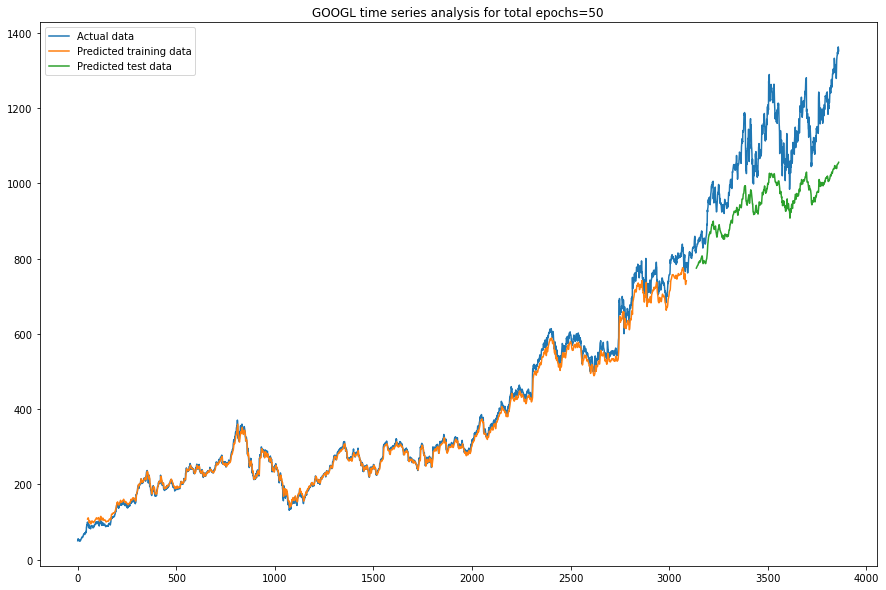

Epoch 1/100
95/95 [==============================] - 18s 194ms/step - loss: 1.7663e-04 - val_loss: 0.0076
Epoch 2/100
95/95 [==============================] - 21s 219ms/step - loss: 1.5226e-04 - val_loss: 0.0060
Epoch 3/100
95/95 [==============================] - 19s 197ms/step - loss: 1.4910e-04 - val_loss: 0.0065
Epoch 4/100
95/95 [==============================] - 18s 193ms/step - loss: 1.6628e-04 - val_loss: 0.0067
Epoch 5/100
95/95 [==============================] - 20s 214ms/step - loss: 1.6015e-04 - val_loss: 0.0087
Epoch 6/100
95/95 [==============================] - 18s 194ms/step - loss: 1.8658e-04 - val_loss: 0.0057
Epoch 7/100
95/95 [==============================] - 18s 194ms/step - loss: 1.6014e-04 - val_loss: 0.0064
Epoch 8/100
95/95 [==============================] - 19s 197ms/step - loss: 1.5348e-04 - val_loss: 0.0083
Epoch 9/100
95/95 [==============================] - 18s 193ms/step - loss: 1.4682e-04 - val_loss: 0.0095
Epoch 10/100
95/95 [==========================

95/95 [==============================] - 19s 195ms/step - loss: 1.3870e-04 - val_loss: 0.0147
Epoch 78/100
95/95 [==============================] - 18s 193ms/step - loss: 1.4082e-04 - val_loss: 0.0167
Epoch 79/100
95/95 [==============================] - 18s 194ms/step - loss: 1.4498e-04 - val_loss: 0.0152
Epoch 80/100
95/95 [==============================] - 19s 196ms/step - loss: 1.3567e-04 - val_loss: 0.0127
Epoch 81/100
95/95 [==============================] - 19s 195ms/step - loss: 1.4191e-04 - val_loss: 0.0118
Epoch 82/100
95/95 [==============================] - 18s 195ms/step - loss: 1.3555e-04 - val_loss: 0.0139
Epoch 83/100
95/95 [==============================] - 19s 196ms/step - loss: 1.4068e-04 - val_loss: 0.0174
Epoch 84/100
95/95 [==============================] - 19s 198ms/step - loss: 1.3139e-04 - val_loss: 0.0167
Epoch 85/100
95/95 [==============================] - 19s 196ms/step - loss: 1.3335e-04 - val_loss: 0.0148
Epoch 86/100
95/95 [==============================

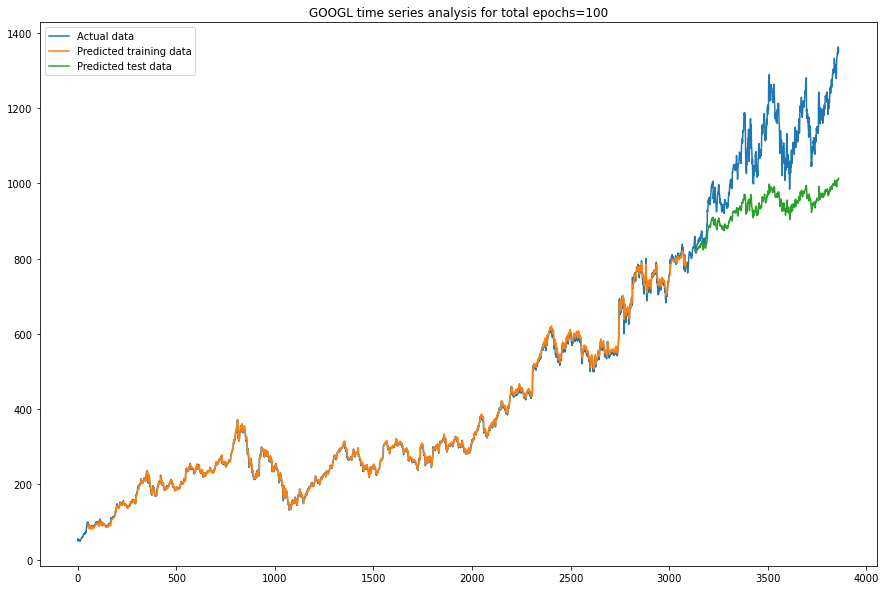

In [37]:
generator(df,"GOOGL time series analysis")

In [38]:
df=pd.read_csv("nke.csv")

In [39]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,16.514999,16.517500,16.280001,16.3375,14.217164,11972400
1,2010-01-05,16.285000,16.447500,16.174999,16.4025,14.273727,6275200
2,2010-01-06,16.350000,16.422501,16.235001,16.3025,14.186704,13399200
3,2010-01-07,16.280001,16.500000,16.262501,16.4625,14.325938,7187600
4,2010-01-08,16.447500,16.462500,16.235001,16.4300,14.297660,7249600


In [40]:
df["Open"].isna().sum()

0

(1956, 50, 1) (1956,)
(452, 50, 1) (452,)
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 50, 96)            37632     
_________________________________________________________________
dropout_24 (Dropout)         (None, 50, 96)            0         
_________________________________________________________________
lstm_25 (LSTM)               (None, 50, 96)            74112     
_________________________________________________________________
dropout_25 (Dropout)         (None, 50, 96)            0         
_________________________________________________________________
lstm_26 (LSTM)               (None, 50, 96)            74112     
_________________________________________________________________
dropout_26 (Dropout)         (None, 50, 96)            0         
_________________________________________________________________
lstm_27 (LST

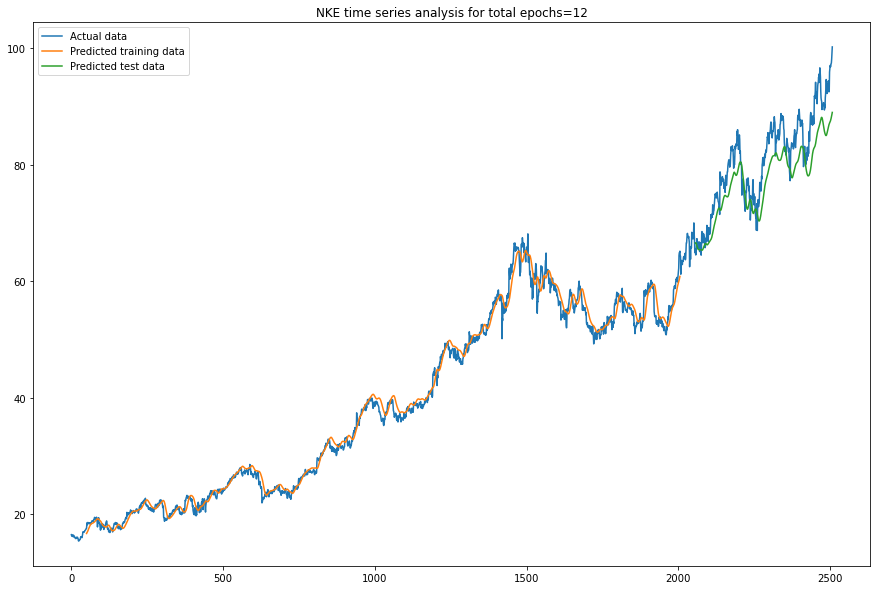

Epoch 1/25
62/62 [==============================] - 13s 208ms/step - loss: 6.5578e-04 - val_loss: 0.0017
Epoch 2/25
62/62 [==============================] - 17s 280ms/step - loss: 7.9766e-04 - val_loss: 0.0086
Epoch 3/25
62/62 [==============================] - 23s 372ms/step - loss: 5.9221e-04 - val_loss: 0.0040
Epoch 4/25
62/62 [==============================] - 46s 746ms/step - loss: 6.9659e-04 - val_loss: 0.0081
Epoch 5/25
62/62 [==============================] - 16s 261ms/step - loss: 6.5258e-04 - val_loss: 0.0041
Epoch 6/25
62/62 [==============================] - 14s 226ms/step - loss: 6.1520e-04 - val_loss: 0.0052
Epoch 7/25
62/62 [==============================] - 13s 213ms/step - loss: 6.5418e-04 - val_loss: 0.0056
Epoch 8/25
62/62 [==============================] - 13s 203ms/step - loss: 5.7101e-04 - val_loss: 0.0015
Epoch 9/25
62/62 [==============================] - 13s 203ms/step - loss: 6.3985e-04 - val_loss: 0.0074
Epoch 10/25
62/62 [==============================] - 13

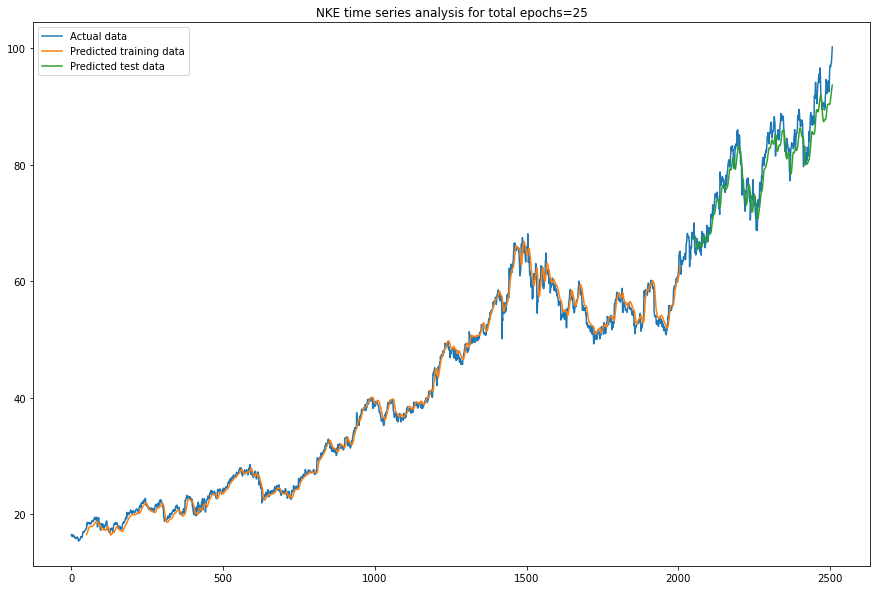

Epoch 1/50
62/62 [==============================] - 12s 201ms/step - loss: 4.4227e-04 - val_loss: 0.0024
Epoch 2/50
62/62 [==============================] - 12s 201ms/step - loss: 4.6724e-04 - val_loss: 0.0023
Epoch 3/50
62/62 [==============================] - 12s 201ms/step - loss: 4.3634e-04 - val_loss: 5.7539e-04
Epoch 4/50
62/62 [==============================] - 12s 201ms/step - loss: 4.0844e-04 - val_loss: 8.2891e-04
Epoch 5/50
62/62 [==============================] - 13s 203ms/step - loss: 3.9866e-04 - val_loss: 7.2696e-04
Epoch 6/50
62/62 [==============================] - 12s 200ms/step - loss: 4.0717e-04 - val_loss: 0.0013
Epoch 7/50
62/62 [==============================] - 13s 202ms/step - loss: 4.0794e-04 - val_loss: 6.8746e-04
Epoch 8/50
62/62 [==============================] - 12s 201ms/step - loss: 4.3334e-04 - val_loss: 6.4379e-04
Epoch 9/50
62/62 [==============================] - 12s 200ms/step - loss: 3.8473e-04 - val_loss: 6.1519e-04
Epoch 10/50
62/62 [============

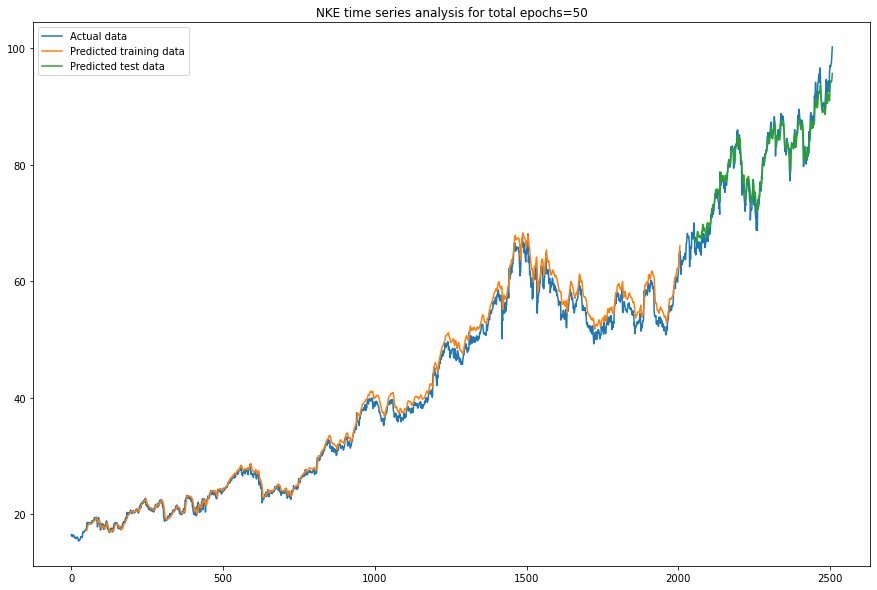

Epoch 1/100
62/62 [==============================] - 14s 226ms/step - loss: 3.2007e-04 - val_loss: 7.9993e-04
Epoch 2/100
62/62 [==============================] - 14s 228ms/step - loss: 2.9957e-04 - val_loss: 8.7866e-04
Epoch 3/100
62/62 [==============================] - 14s 226ms/step - loss: 3.0712e-04 - val_loss: 0.0026
Epoch 4/100
62/62 [==============================] - 14s 230ms/step - loss: 2.8826e-04 - val_loss: 6.1997e-04
Epoch 5/100
62/62 [==============================] - 14s 225ms/step - loss: 2.9203e-04 - val_loss: 0.0025
Epoch 6/100
62/62 [==============================] - 14s 225ms/step - loss: 3.1041e-04 - val_loss: 0.0038
Epoch 7/100
62/62 [==============================] - 14s 225ms/step - loss: 2.9507e-04 - val_loss: 5.1506e-04
Epoch 8/100
62/62 [==============================] - 15s 234ms/step - loss: 2.7252e-04 - val_loss: 3.9695e-04
Epoch 9/100
62/62 [==============================] - 14s 226ms/step - loss: 3.1746e-04 - val_loss: 0.0024
Epoch 10/100
62/62 [======

Epoch 77/100
62/62 [==============================] - 14s 224ms/step - loss: 3.0636e-04 - val_loss: 0.0049
Epoch 78/100
62/62 [==============================] - 14s 224ms/step - loss: 2.1104e-04 - val_loss: 0.0039
Epoch 79/100
62/62 [==============================] - 14s 227ms/step - loss: 2.8440e-04 - val_loss: 0.0053
Epoch 80/100
62/62 [==============================] - 15s 234ms/step - loss: 2.4442e-04 - val_loss: 0.0037
Epoch 81/100
62/62 [==============================] - 14s 225ms/step - loss: 2.5616e-04 - val_loss: 0.0020
Epoch 82/100
62/62 [==============================] - 14s 228ms/step - loss: 2.5737e-04 - val_loss: 0.0031
Epoch 83/100
62/62 [==============================] - 14s 230ms/step - loss: 2.3636e-04 - val_loss: 0.0045
Epoch 84/100
62/62 [==============================] - 14s 224ms/step - loss: 2.6854e-04 - val_loss: 0.0019
Epoch 85/100
62/62 [==============================] - 18s 295ms/step - loss: 2.5627e-04 - val_loss: 0.0029
Epoch 86/100
62/62 [=================

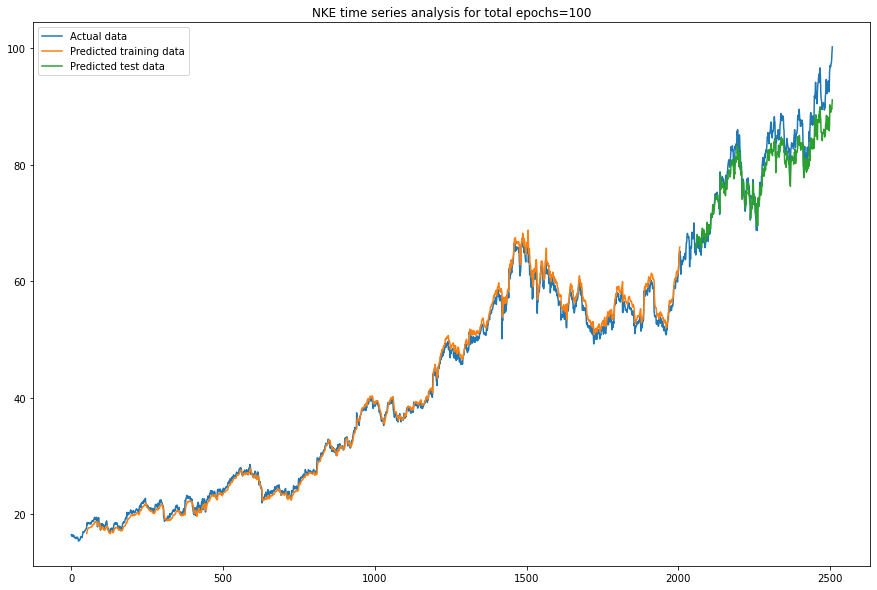

In [41]:
generator(df,"NKE time series analysis")